# Diabetes Exploratory Data Analysis



__Author:__ Desiree Unselt <br>
__Date:__ 30JUL2024 <br>

__Dataset:__ Diabetes 130 dataset representing 130 US hospitals collected from 1999 to 2008, hosted on the UC Irvine Dataset Repository.

__Objectives:__
  - Perform an exploratory data analysis (EDA) on the dataset to understand how it's structured and what it contains
  - Once completed:
    - Ask someone to review your code
    - Share your findings wiht the team
    - Commit your code to a local git repository
  - Think about how you could train a model to predict patient readmission, then try and build a model to predict this property.
    - The dataset has the following classes in the readmission column:
        - 'No' (didn't get readmitted)
        - '>30' (was readmitted after 30 days)
        - '<30' (was readmitted within 30 days)
    - How can you measure the performance of the model? How well is it doing?
    - What's the best model that you can develop?
    - How does it compare against other volunteer models? Can you combine ideas from other people to make your model better?
  - Can you come up with a reasonable real life application of these algorithms being applied to the Diabetes data? Are there any limitations of your approach?

## Exploratory Data Analysis (EDA)

### Import Libraries, Set Working Directory, and Load Data

In [1]:
import importlib

packages = ['sklearn', 'seaborn', 'matplotlib', 'scipy', 'lazypredict']

for package in packages:
    try:
        importlib.import_module(package)
        print(f"{package} is installed")
    except ImportError:
        print(f"{package} is NOT installed")

sklearn is installed
seaborn is installed
matplotlib is installed
scipy is installed
lazypredict is installed


In [8]:
# Import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


# For building ML models
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, fcluster

In [9]:
# Change working directory
os.chdir('/data/results/desiree/input/')

# Load diabetes data
df_diabetes = pd.read_csv('diabetic_data.csv')
pd.set_option('display.max_columns', None)
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Review Dataset Shape

In [10]:
# Change working directory
os.chdir('/data/results/desiree/output/')

# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df_diabetes.shape[0])
print("Number of columns are: ",df_diabetes.shape[1])

Number of rows are:  101766
Number of columns are:  50


### Review Dataset Information

In [25]:
# Dataset Info
# Checking information about the dataset using info
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [26]:
# Dataset Duplicate Value Count
dup = df_diabetes.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [27]:
# Missing Values/Null Values Count
df_diabetes.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Summary of high level overview of data:
- Patient encounter data including demographic, diagnoses, medications, and readmission information
- A patient can have more than one encounter (will need to decide on how to handle for modeling)
- Dimensions: 101766 rows, 50 columns
- Columns listed as objects requiring further review to confirm consistency in reporting
    - race
    - gender
    - age
    - weight
    - payer_code
    - medical_specialty
    - diag_1, diag_2, diag_3
    - max_glu_serum (5346 non-null)
    - A1Cresult (17018 non-null)
    - medications (metformin ... metformin-pioglitazone)
    - change
    - diabetesMed
    - readmitted
- Number of duplicated rows: 0
- Columns with NULL values: max_glu_serum (96420) and A1Cresult (84748)

In [28]:
# Print column names
print(df_diabetes.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [29]:
# Dataset Describe  (all columns included)
df_diabetes.describe(include='all').round(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.00,101766.00,101766.00,101766.00,101766,101766,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766,101766,101766,101766.00,5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,18,73,NaN,NaN,NaN,NaN,NaN,NaN,717,749,790,NaN,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,40256,49949,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.02,3.72,5.75,4.40,NaN,NaN,43.10,1.34,16.02,0.37,0.20,0.64,NaN,NaN,NaN,7.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.45,5.28,4.06,2.99,NaN,NaN,19.67,1.71,8.13,1.27,0.93,1.26,NaN,NaN,NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.00,1.00,1.00,2.00,NaN,NaN,31.00,0.00,10.00,0.00,0.00,0.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.00,1.00,7.00,4.00,NaN,NaN,44.00,1.00,15.00,0.00,0.00,0.00,NaN,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.00,4.00,7.00,6.00,NaN,NaN,57.00,2.00,20.00,0.00,0.00,1.00,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Create a table containing mean, median, mode, and standard deviation for numerical columns
numerical_columns = df_diabetes.select_dtypes(include=np.number).columns
# Drop identifier columns
numerical_columns = numerical_columns.drop(['encounter_id', 'patient_nbr'])
statistics_table = pd.DataFrame(columns=['Column', 'Mean', 'Median', 'Mode', 'Standard Deviation'])

for column in numerical_columns:
    mean = df_diabetes[column].mean()
    median = df_diabetes[column].median()
    mode = df_diabetes[column].mode().values[0]
    std_dev = df_diabetes[column].std()
    new_row = pd.DataFrame({'Column': [column], 'Mean': [mean], 'Median': [median], 'Mode': [mode], 'Standard Deviation': [std_dev]})
    statistics_table = pd.concat([statistics_table, new_row], ignore_index=True)

statistics_table.to_csv('stats_table.csv', index=False)


**Note:**
- weight, payer_code, medical_specialty have '?' as top input

In [32]:
# Check Unique Values for each variable.
for i in df_diabetes.columns.tolist():
    print("No. of unique values in",i,"is",df_diabetes[i].nunique())

No. of unique values in encounter_id is 101766
No. of unique values in patient_nbr is 71518
No. of unique values in race is 6
No. of unique values in gender is 3
No. of unique values in age is 10
No. of unique values in weight is 10
No. of unique values in admission_type_id is 8
No. of unique values in discharge_disposition_id is 26
No. of unique values in admission_source_id is 17
No. of unique values in time_in_hospital is 14
No. of unique values in payer_code is 18
No. of unique values in medical_specialty is 73
No. of unique values in num_lab_procedures is 118
No. of unique values in num_procedures is 7
No. of unique values in num_medications is 75
No. of unique values in number_outpatient is 39
No. of unique values in number_emergency is 33
No. of unique values in number_inpatient is 21
No. of unique values in diag_1 is 717
No. of unique values in diag_2 is 749
No. of unique values in diag_3 is 790
No. of unique values in number_diagnoses is 16
No. of unique values in max_glu_seru

- 101766 encounters
- 71518 patients
- '?' Race, Weight, Payer_code, Medical_specialty (will need to clean up), Diag_1, Diag_2, Diag_3
- 'Unknown/invalid' Gender 
- 'No' only: Examide, Citoglipton

In [33]:
# Convert '?' to null values
df_diabetes.replace('?', np.nan, inplace=True)

# Create a table containing the number of missing values for each column in one column and then another column as percentage of total rows
missing_values_table = pd.DataFrame(columns=['Column', 'Missing Values', 'Percentage of Total Rows'])

for column in df_diabetes.columns:
    missing_values = df_diabetes[column].isnull().sum()
    percentage = (missing_values / len(df_diabetes)) * 100
    new_row = pd.DataFrame({'Column': [column], 'Missing Values': [missing_values], 'Percentage of Total Rows': [percentage]})
    missing_values_table = pd.concat([missing_values_table, new_row], ignore_index=True)

missing_values_table.to_csv('missing_values_table.csv', index=False)


In [34]:
# Drop columns with <80% NULL or no variance in dataset
# These won't contribute to model prediction
df_diabetes.drop(columns=['weight','max_glu_serum','A1Cresult','examide', 'citoglipton'], inplace=True)
df_diabetes.shape

(101766, 45)

In [35]:
# Clean up Medical_specialty
# Updating Adult categories
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace(['Gynecology', 'Obstetrics', 'ObstetricsandGynecology'], 'OBGYN')
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace('Obsterics&Gynecology-GynecologicOnco', 'OBGYN/Oncology')
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace('Radiologist', 'Radiology')
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace('Surgery-Cardiovascular/Thoracic', 'Surgery-Cardiovascular')
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace('Surgery-PlasticwithinHeadandNeck', 'Surgery-Plastic')

# Updating Pediatric categories
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace('Anesthesiology-Pediatric', 'Pediatrics-Anesthesiology')
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace('Cardiology-Pediatric', 'Pediatrics-Cardiology')
df_diabetes['medical_specialty'] = df_diabetes['medical_specialty'].replace('Surgery-Pediatric', 'Pediatrics-Surgery')

medical_specialty_counts = df_diabetes['medical_specialty'].value_counts()
medical_specialty_counts.to_csv('medical_specialty_counts_updated.csv')
df_diabetes.to_csv('df_diabetes_updated.csv', index=False)

Making modifications to the medical_specialty outputs for consistency and grouping of very similar categories (e.g. Radiology vs Radiologist). Could potentially lump all of Pediatrics together and Surgery together

Steps to clean up data
- need to recategorize ICD codes
- How to consolidate to represent 1 patient per row
    - Take mode: Patient_nbr, Race, Gender, Weight, Payer_code, medical_specialty, diag_1, diag_2, diag_3, max_glu_serum, A1Cresult, medications, change, diabetesMed, readmitted
    - Take most recent encounter: Age; admission_type, discharge_disposition_id, admission_source
    - Take mean / median: time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_impatient, number_diagnoses

Attempt 1 for ICD9 re-categorization
- Following the methods outlined in a paper written using this dataset, which includes 9 groups with those <3.5% of encounters lumped as 'Other'.

In [36]:
# For diag_1, diag_2, and diag_3, if the value is null, replace with '0'
for column in ['diag_1', 'diag_2', 'diag_3']:
    df_diabetes[column] = df_diabetes[column].apply(lambda x: '0' if pd.isnull(x) else x)

# Grouping similiar ICD9 diagnosis categories together
# Function to replace ICD9 diagnosis categories with group names
def replace_icd9_categories(x):
    try:
        x_int = int(x)
        if 390 <= x_int <= 459 or x == '785':
            return 'Circulatory'
        elif 460 <= x_int <= 519 or x == '786':
            return 'Respiratory'
        elif 520 <= x_int <= 579 or x == '787':
            return 'Digestive'
        elif 800 <= x_int <= 999:
            return 'Injury'
        elif 710 <= x_int <= 739:
            return 'Musculoskeletal'
        elif 140 <= x_int <= 239:
            return 'Neoplasms'
        elif x == '250':
            return 'Diabetes'
        elif 580 <= x_int <= 629 or x == '788':
            return 'Genitourinary'
        elif x_int == 0:
            return 'Unknown'
        else:
            return 'Other'
    except ValueError:
        if x.startswith('250'):
            return 'Diabetes'
        else:
            return 'Other'

# Apply the function to the diag_1 column
# For diag_1, diag_2, and diag_3, if the value is null, replace with '0'
for column in ['diag_1', 'diag_2', 'diag_3']:
    df_diabetes[f"{column}_group"] = df_diabetes[column].apply(replace_icd9_categories)

df_diabetes.to_csv('df_diabetes_icd_groups.csv', index=False)



In [37]:
# Consolidate to represent 1 patient per row
# Take mode: Patient_nbr, Race, Gender, Weight, Payer_code, medical_specialty, diag_1, diag_2, diag_3, max_glu_serum, A1Cresult, medications, change, diabetesMed, readmitted
# Take most recent encounter: Age; admission_type, discharge_disposition_id, admission_source
# Take mean: time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_impatient, number_diagnoses

# For each Patient_nbr, come up with a consensus
# Sort the DataFrame by patient_nbr and encounter_id (assuming encounter_id is a proxy for the encounter date)
df_diabetes_sorted = df_diabetes.sort_values(by=['patient_nbr', 'encounter_id'], ascending=[True, False])

# Drop duplicates to keep only the most recent encounter for each patient
df_most_recent_encounter = df_diabetes_sorted.drop_duplicates(subset=['patient_nbr'], keep='first')

# Extract the most recent age, admission, and discharge for each patient
df_most_recent_age = df_most_recent_encounter[['patient_nbr', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']]

# Define a function to get the mode of a series
def get_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Group by patient_nbr and apply the get_mode function
df_patient_info = df_diabetes.groupby('patient_nbr').agg({
    'race': lambda x: get_mode(x),
    'gender': lambda x: get_mode(x),
    'payer_code': lambda x: get_mode(x),
    'medical_specialty': lambda x: get_mode(x),
    'diag_1_group': lambda x: get_mode(x),
    'diag_2_group': lambda x: get_mode(x),
    'diag_3_group': lambda x: get_mode(x),
    'change': lambda x: get_mode(x),
    'diabetesMed': lambda x: get_mode(x),
    'readmitted': lambda x: get_mode(x),
    'metformin': lambda x: get_mode(x),
    'repaglinide': lambda x: get_mode(x),
    'nateglinide': lambda x: get_mode(x),
    'chlorpropamide': lambda x: get_mode(x),
    'glimepiride': lambda x: get_mode(x),
    'acetohexamide': lambda x: get_mode(x),
    'glipizide': lambda x: get_mode(x),
    'glyburide': lambda x: get_mode(x),
    'tolbutamide': lambda x: get_mode(x),
    'pioglitazone': lambda x: get_mode(x),
    'rosiglitazone': lambda x: get_mode(x),
    'acarbose': lambda x: get_mode(x),
    'miglitol': lambda x: get_mode(x),
    'troglitazone': lambda x: get_mode(x),
    'tolazamide': lambda x: get_mode(x),
    'insulin': lambda x: get_mode(x),
    'glyburide-metformin': lambda x: get_mode(x),
    'glipizide-metformin': lambda x: get_mode(x),
    'glimepiride-pioglitazone': lambda x: get_mode(x),
    'metformin-rosiglitazone': lambda x: get_mode(x),
    'metformin-pioglitazone': lambda x: get_mode(x),
    'time_in_hospital': 'mean',
    'num_lab_procedures': 'mean',
    'num_procedures': 'mean',
    'num_medications': 'mean',
    'number_outpatient': 'mean',
    'number_emergency': 'mean',
    'number_inpatient': 'mean',
    'number_diagnoses': 'mean'
}).reset_index()

# Merge the most recent age information with the aggregated data
df_final = df_patient_info.merge(df_most_recent_age, on='patient_nbr', how='left')
# takes almost 8 min to run

In [ ]:
# check for missing values
print(df_final.isnull().sum())
# Save the result to a CSV file
df_final.to_csv('df_patient_info_one_row.csv', index=False)

In [12]:
# Perform mode imputation on race
mode_race = df_final['race'].mode()[0]
df_final['race'].fillna(mode_race, inplace=True)

# Perform mode imputation for 'Unknown' diagnoses
for x in ['diag_1_group', 'diag_2_group', 'diag_3_group']:
    # Determine mode for each column
    mode = df_final[x].mode()[0]
    # Replace 'Unknown' values with mode
    df_final[x].replace('Unknown', mode, inplace=True)

In [13]:
# Drop payer_code and medical_specialty for now
# Might add them back later (missingness is >40%)
df_final.drop(columns=['payer_code', 'medical_specialty'], inplace=True)
# check for null values
# print(df_final.isnull().sum())
df_final.to_csv('df_patient_info_imputed.csv', index=False)


In [15]:
df_final = pd.read_csv('df_patient_info_imputed.csv')

In [ ]:
print(df_final)

In [ ]:
# Define the features and target variable
X = df_final.drop(columns=['readmitted', 'patient_nbr'])
# Convert categorical data to numerical data
X = pd.get_dummies(X, drop_first=True)

y = df_final['readmitted']

In [21]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
SEED=1
# Create a Logistic Regression model
# Scaling a pipeline
steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state=SEED, multi_class='multinomial', solver='lbfgs'))]
pipeline = Pipeline(steps)

parameters = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logreg__max_iter': np.arange(100, 1000, 100)}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

# Initialize the Logistic Regression model
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit the model on the training data
cv.fit(X_train,y_train)
# Make predictions on the test data
y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)


# Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')


/data/venvs/py38_pratyush/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/venvs/py38_pratyush/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.6943989772943595
{'logreg__C': 0.1, 'logreg__max_iter': 100}


/data/venvs/py38_pratyush/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
# Scaling a pipeline
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(15,30)}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)


0.6391274343752642
{'knn__n_neighbors': 29}


In [146]:
# Evaluating classification models
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy : {}".format(name,test_score))



In [172]:
# Decision Tree Classifier
SEED=1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)
dt = DecisionTreeClassifier(random_state=SEED)

params_dt = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

# Initiate a 5-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=5, n_jobs=-1)

# Fit 'grid_dt' to the training data
# dt.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy: {:.3f}'.format(best_CV_score))

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accurcy
test_acc = best_model.score(X_test, y_test)

print('Test set accuracy of best model: {:.3f}'.format(test_acc))

# y_pred = dt.predict(X_test)
# accuracy_score(y_test, y_pred)
# print(dt.get_params())

Best hyperparameters:
 {'max_depth': 4, 'max_features': 0.6, 'min_samples_leaf': 0.04}
Best CV accuracy: 0.723
Test set accuracy of best model: 0.724


In [161]:
SEED=1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
classifiers = [('K Nearest Neighbors', knn), ('Classification Tree', dt)]

for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = clf.predict(X_test)

    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

# Instantiate a Voting Classifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier : {:.3f}'.format(accuracy_score(y_test, y_pred)))



K Nearest Neighbors : 0.569
Classification Tree : 0.633
Voting Classifier : 0.535


In [165]:
SEED=1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

# Instantiate a classification tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
# bc = BaggingClassifier(estimator=dt, n_estimators=300, n_jobs=-1)

# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
# accuracy = accuracy_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

# print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))
print('Test Set Accuracy: {:.3f}'.format(test_accuracy))
print('OOB Accuracy: {:.3f}'.format(oob_accuracy))



Test Set Accuracy: 0.724
OOB Accuracy: 0.722


In [121]:
# KNN Modeling
# Doesn't do so well

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(15,20)

for neighbor in neighbors:
    # Initialize KNeighborsClassifier
    knn = KNN(n_neighbors=neighbor)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# print(knn.score(X_test,y_test))

# Make predictions on the test data
# y_pred = knn.predict(X_test)

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

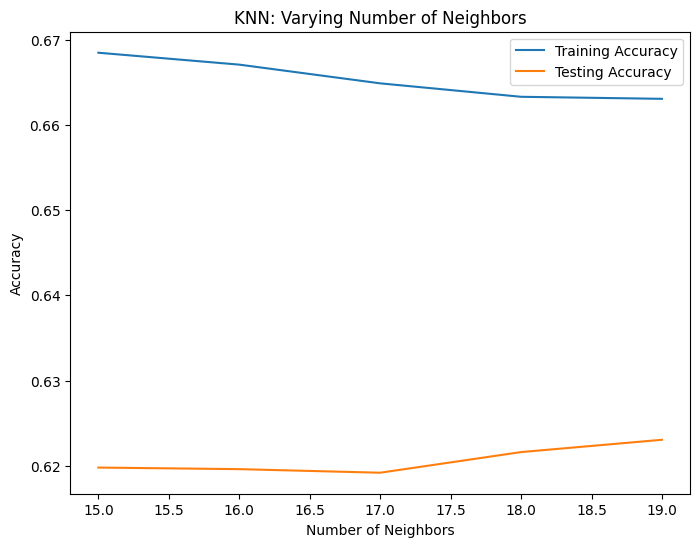

In [122]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [98]:
# Define the features and target variable
X = df_final.drop(columns=['readmitted', 'patient_nbr'])
# Convert categorical data to numerical data
X = pd.get_dummies(X, drop_first=True)

y = df_final['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.749650447427293
